In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

import category_encoders as ce

In [2]:
data= pd.read_csv('Dataset4_fil.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35112 entries, 0 to 35111
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    35112 non-null  int64  
 1   Unnamed: 0      35112 non-null  int64  
 2   UTC             35112 non-null  int64  
 3   Temperature[C]  35112 non-null  float64
 4   Humidity[%]     35112 non-null  float64
 5   TVOC[ppb]       35112 non-null  float64
 6   eCO2[ppm]       35112 non-null  float64
 7   Raw H2          35112 non-null  float64
 8   Raw Ethanol     35112 non-null  int64  
 9   Pressure[hPa]   35112 non-null  float64
 10  PM1.0           35112 non-null  float64
 11  PM2.5           35112 non-null  float64
 12  NC0.5           35112 non-null  float64
 13  NC1.0           35112 non-null  float64
 14  NC2.5           35112 non-null  float64
 15  CNT             35112 non-null  int64  
 16  Fire Alarm      35112 non-null  int64  
dtypes: float64(11), int64(6)
memory

In [4]:
data.head(5)

,Unnamed: 0.1,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,240,240,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,0
1,247,247,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,0
2,248,248,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,0
3,249,249,1654733580,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249,0
4,250,250,1654733581,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250,0


In [5]:
pd.crosstab(data['Fire Alarm'],data['Fire Alarm'], normalize='all')*100

Fire Alarm,0,1
Fire Alarm,,
0,13.610731,0.000000
1,0.000000,86.389269


In [6]:
data.drop('Unnamed: 0',axis=1, inplace=True)


In [7]:
data.drop('Unnamed: 0.1',axis=1, inplace=True)
data

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240,0
1,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247,0
2,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248,0
3,1654733580,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249,0
4,1654733581,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,1654786336,25.190,49.55,1396.0,433.0,12969.0,19373,938.873,1.57,1.63,10.77,1.680,0.038,24993,1
35108,1654712268,26.840,44.99,17.0,415.0,12863.0,20774,937.630,2.18,2.26,15.00,2.340,0.053,81,0
35109,1654712269,26.810,45.00,27.0,426.0,12853.0,20763,937.634,2.18,2.26,15.00,2.339,0.053,82,0
35110,1654712272,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85,0


In [8]:
Y = data["Fire Alarm"]
X = data.drop(["Fire Alarm"],axis=1)
Y

0        0
1        0
2        0
3        0
4        0
        ..
35107    1
35108    0
35109    0
35110    0
35111    0
Name: Fire Alarm, Length: 35112, dtype: int64

In [9]:
X

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,1654733571,23.056,51.11,1.0,400.0,12626.0,19698,939.810,0.08,0.14,0.43,0.156,0.056,240
1,1654733578,23.131,50.08,5.0,400.0,12633.0,19696,939.813,0.09,0.17,0.46,0.189,0.074,247
2,1654733579,23.142,50.00,0.0,400.0,12629.0,19704,939.790,0.10,0.17,0.49,0.189,0.072,248
3,1654733580,23.153,49.85,12.0,400.0,12630.0,19698,939.791,0.10,0.18,0.50,0.195,0.074,249
4,1654733581,23.163,49.71,11.0,400.0,12637.0,19710,939.812,0.10,0.17,0.49,0.192,0.073,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35107,1654786336,25.190,49.55,1396.0,433.0,12969.0,19373,938.873,1.57,1.63,10.77,1.680,0.038,24993
35108,1654712268,26.840,44.99,17.0,415.0,12863.0,20774,937.630,2.18,2.26,15.00,2.340,0.053,81
35109,1654712269,26.810,45.00,27.0,426.0,12853.0,20763,937.634,2.18,2.26,15.00,2.339,0.053,82
35110,1654712272,28.910,42.89,31.0,415.0,12871.0,20756,937.625,2.15,2.24,14.81,2.310,0.052,85


In [10]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [11]:
col_names = ['UTC','Temperature[C]','Humidity[%]', 'TVOC[ppb]' ,'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm']
data.columns = col_names
col_names

['UTC',
 'Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'eCO2[ppm]',
 'Raw H2',
 'Raw Ethanol',
 'Pressure[hPa]',
 'PM1.0',
 'PM2.5',
 'NC0.5',
 'NC1.0',
 'NC2.5',
 'CNT',
 'Fire Alarm']

In [12]:
for col in col_names:
    print(data[col].value_counts())

1654733571    1
1654769374    1
1654769368    1
1654769369    1
1654769370    1
             ..
1654751181    1
1654751180    1
1654751179    1
1654751178    1
1654712274    1
Name: UTC, Length: 35112, dtype: int64
 24.480    170
 24.510    158
 24.450    146
 26.950    146
 26.920    146
          ... 
-7.916       1
-7.913       1
-7.909       1
-7.906       1
 29.160      1
Name: Temperature[C], Length: 12722, dtype: int64
47.560000    99
53.410000    98
47.450000    98
53.630000    97
53.360000    95
             ..
54.980002     1
58.410983     1
58.147716     1
51.815030     1
41.350000     1
Name: Humidity[%], Length: 1443, dtype: int64
0.000000       845
1141.000000    242
1136.000000    211
1159.000000    206
1147.000000    200
              ... 
13.437530        1
1330.616912      1
1073.028936      1
350.751746       1
583.341415       1
Name: TVOC[ppb], Length: 1065, dtype: int64
400.000000    22856
408.000000      653
404.000000      653
401.000000      652
406.000000     

In [13]:
Y.value_counts()

1    30333
0     4779
Name: Fire Alarm, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((23525, 14), (11587, 14))

In [15]:
encoder = ce.OrdinalEncoder(cols=['UTC','Temperature[C]','Humidity[%]', 'TVOC[ppb]' ,'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [16]:
X_train.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
29349,1,1,1,1,1,1,1,1,1,1,1,1,1,1
24554,2,2,2,2,2,2,2,2,2,2,2,2,2,2
20532,3,3,3,3,3,3,3,3,3,3,3,3,3,3
14594,4,4,4,4,4,4,4,4,4,4,4,4,4,4
24744,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [17]:
X_test.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
26470,-1.0,218.0,505.0,247.0,53.0,144.0,8.0,44.0,142.0,148.0,1112.0,1357.0,16,12964.0
7920,-1.0,-1.0,673.0,78.0,83.0,163.0,73.0,819.0,5.0,5.0,1132.0,1870.0,5,7708.0
22618,-1.0,853.0,831.0,147.0,3.0,27.0,30.0,881.0,59.0,62.0,67.0,67.0,37,-1.0
7599,-1.0,5893.0,1135.0,547.0,3.0,403.0,566.0,709.0,33.0,34.0,816.0,929.0,25,-1.0
34198,-1.0,648.0,366.0,130.0,3.0,118.0,9.0,347.0,19.0,19.0,424.0,1509.0,5,-1.0


In [18]:
#Создаем экземпляр модели DecisionTreeClassifier с критерием Gini
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# обучение модели
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:
text_representation = tree.export_text(clf_gini)
print(text_representation)

|--- feature_12 <= 48.50
|   |--- feature_9 <= 174.50
|   |   |--- feature_4 <= 3.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  3.50
|   |   |   |--- class: 1
|   |--- feature_9 >  174.50
|   |   |--- feature_12 <= 13.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  13.50
|   |   |   |--- class: 1
|--- feature_12 >  48.50
|   |--- feature_12 <= 55.50
|   |   |--- feature_12 <= 50.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  50.50
|   |   |   |--- class: 0
|   |--- feature_12 >  55.50
|   |   |--- feature_12 <= 58.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  58.50
|   |   |   |--- class: 0



In [20]:
y_pred_gini = clf_gini.predict(X_test)

In [21]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8787


In [22]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [23]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8766


In [24]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8766
Test set score: 0.8787


[Text(0.5, 0.875, 'x[12] <= 48.5\ngini = 0.238\nsamples = 23525\nvalue = [3243, 20282]'),
 Text(0.25, 0.625, 'x[9] <= 174.5\ngini = 0.179\nsamples = 20896\nvalue = [2072, 18824]'),
 Text(0.125, 0.375, 'x[4] <= 3.5\ngini = 0.123\nsamples = 17967\nvalue = [1187, 16780]'),
 Text(0.0625, 0.125, 'gini = 0.201\nsamples = 10439\nvalue = [1185, 9254]'),
 Text(0.1875, 0.125, 'gini = 0.001\nsamples = 7528\nvalue = [2, 7526]'),
 Text(0.375, 0.375, 'x[12] <= 13.5\ngini = 0.422\nsamples = 2929\nvalue = [885, 2044]'),
 Text(0.3125, 0.125, 'gini = 0.073\nsamples = 690\nvalue = [26, 664]'),
 Text(0.4375, 0.125, 'gini = 0.473\nsamples = 2239\nvalue = [859, 1380]'),
 Text(0.75, 0.625, 'x[12] <= 55.5\ngini = 0.494\nsamples = 2629\nvalue = [1171, 1458]'),
 Text(0.625, 0.375, 'x[12] <= 50.5\ngini = 0.497\nsamples = 1430\nvalue = [771, 659]'),
 Text(0.5625, 0.125, 'gini = 0.465\nsamples = 611\nvalue = [225, 386]'),
 Text(0.6875, 0.125, 'gini = 0.444\nsamples = 819\nvalue = [546, 273]'),
 Text(0.875, 0.375, 

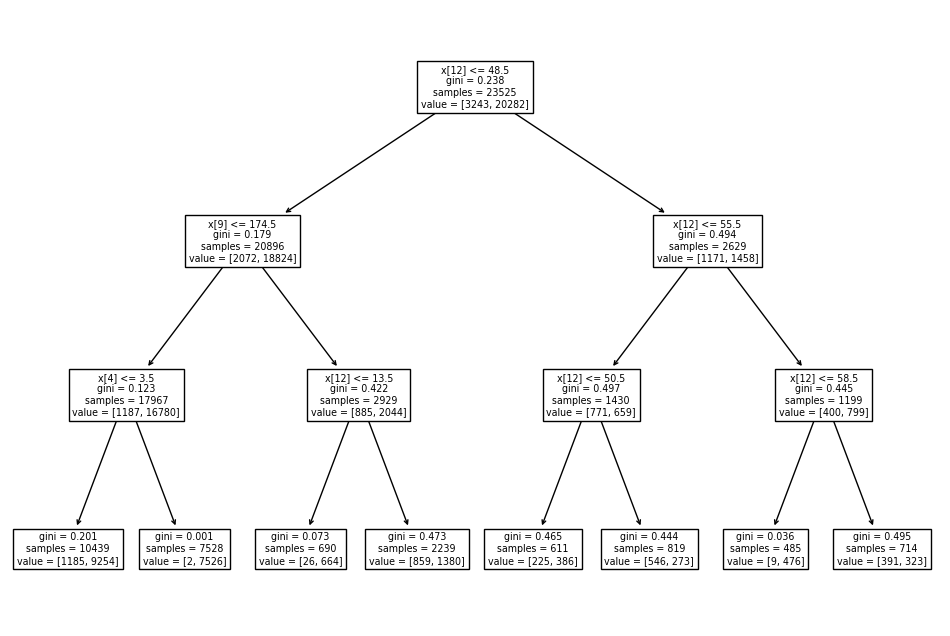

In [25]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

In [26]:
df = data.drop(["Fire Alarm"],axis=1)
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT'],
      dtype='object')

In [27]:
###Дерево с критерием энтропия

In [28]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred_en = clf_en.predict(X_test)

In [30]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8674


In [31]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8622


In [33]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8622
Test set score: 0.8674


[Text(0.5416666666666666, 0.875, 'x[4] <= 3.5\nentropy = 0.579\nsamples = 23525\nvalue = [3243, 20282]'),
 Text(0.3333333333333333, 0.625, 'x[12] <= 17.5\nentropy = 0.738\nsamples = 15556\nvalue = [3241, 12315]'),
 Text(0.16666666666666666, 0.375, 'x[5] <= 341.5\nentropy = 0.343\nsamples = 5341\nvalue = [341, 5000]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.249\nsamples = 4586\nvalue = [190, 4396]'),
 Text(0.25, 0.125, 'entropy = 0.722\nsamples = 755\nvalue = [151, 604]'),
 Text(0.5, 0.375, 'x[9] <= 146.5\nentropy = 0.861\nsamples = 10215\nvalue = [2900, 7315]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.661\nsamples = 5571\nvalue = [956, 4615]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.981\nsamples = 4644\nvalue = [1944, 2700]'),
 Text(0.75, 0.625, 'x[6] <= 604.5\nentropy = 0.003\nsamples = 7969\nvalue = [2, 7967]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 7950\nvalue = [0, 7950]'),
 Text(0.8333333333333334, 0.375, 'x[3] <= 233.0\nentropy = 0.485\ns

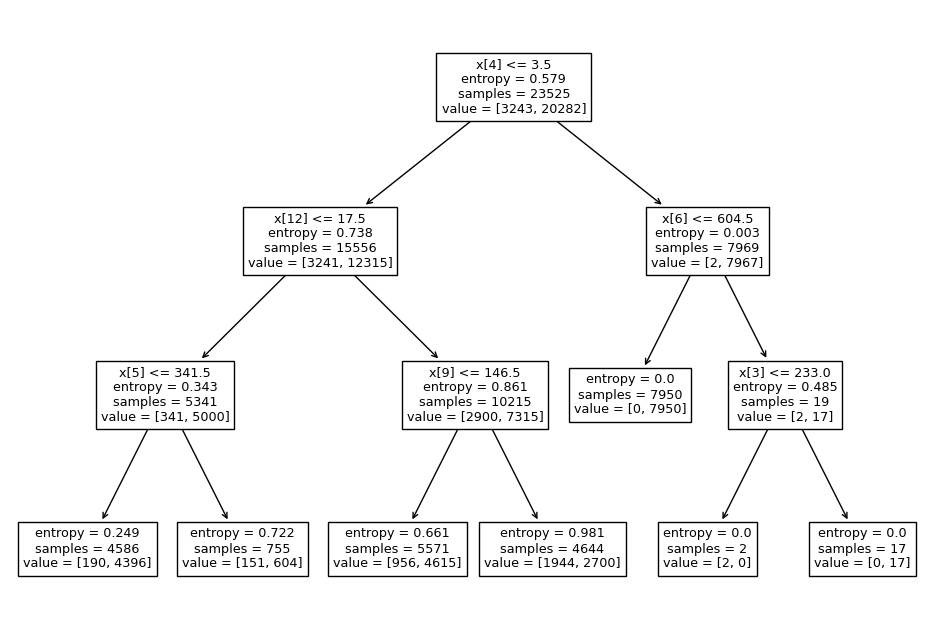

In [34]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train, y_train))

In [35]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[    0  1536]
 [    1 10050]]


In [36]:
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1536
           1       0.87      1.00      0.93     10051

    accuracy                           0.87     11587
   macro avg       0.43      0.50      0.46     11587
weighted avg       0.75      0.87      0.81     11587



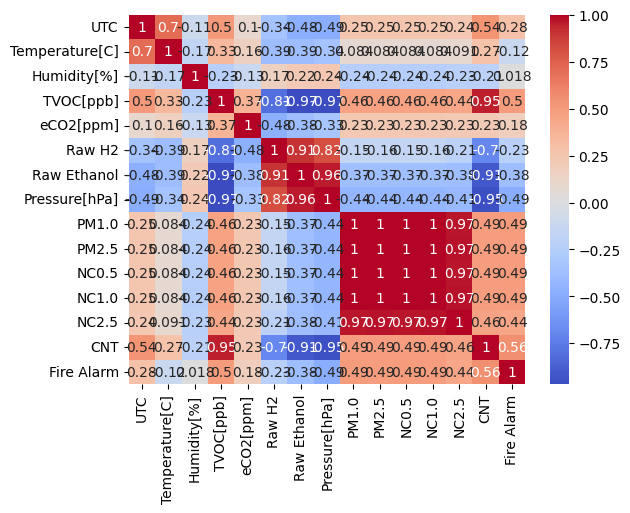

In [37]:
sns.heatmap(data.corr(), cmap='coolwarm',annot=True)
plt.show()

In [38]:
clf_gini.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [39]:
path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [40]:
len(ccp_alphas)

699

In [41]:
path.keys()

dict_keys(['ccp_alphas', 'impurities'])

In [42]:
path

{'ccp_alphas': array([0.00000000e+00, 2.76474603e-05, 3.37804202e-05, 3.54233085e-05,
        3.77848624e-05, 3.77848624e-05, 3.86436093e-05, 3.89656394e-05,
        3.89656394e-05, 3.89656394e-05, 3.91073326e-05, 3.92381264e-05,
        3.92381264e-05, 3.94716867e-05, 3.94716867e-05, 3.96741056e-05,
        3.99054415e-05, 4.00075014e-05, 4.01464163e-05, 4.01464163e-05,
        4.01464163e-05, 4.01464163e-05, 4.02707087e-05, 4.03825717e-05,
        4.04837812e-05, 4.05757898e-05, 4.05757898e-05, 4.06597976e-05,
        4.06597976e-05, 4.06597976e-05, 4.07368048e-05, 4.08076514e-05,
        4.08730483e-05, 4.09038959e-05, 4.09038959e-05, 4.09898284e-05,
        4.10421782e-05, 4.10421782e-05, 4.10910379e-05, 4.10910379e-05,
        4.11367454e-05, 4.11367454e-05, 4.11367454e-05, 4.11378503e-05,
        4.11795962e-05, 4.12327311e-05, 4.12577358e-05, 4.12934568e-05,
        4.12934568e-05, 4.12934568e-05, 4.12934568e-05, 4.13591062e-05,
        4.14711905e-05, 4.15418800e-05, 4.15838839

In [ ]:
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))

output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

In [ ]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [ ]:
np.argmax(output['accuracy_CV'])

In [ ]:
output.iloc[np.argmax(output['accuracy_CV']),]

In [ ]:
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

In [ ]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

In [ ]:
optimal_DT.get_params()

In [ ]:
optimal_DT.get_depth()

In [ ]:
optimal_DT.get_n_leaves()

In [ ]:
accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [ ]:
accuracy

In [ ]:
round(accuracy.mean(),3)

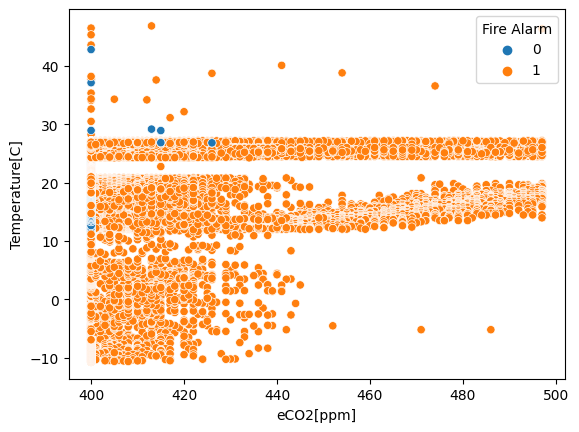

In [43]:
sns.scatterplot(x='eCO2[ppm]', y='Temperature[C]', data=data, hue='Fire Alarm')
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35112 entries, 0 to 35111
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             35112 non-null  int64  
 1   Temperature[C]  35112 non-null  float64
 2   Humidity[%]     35112 non-null  float64
 3   TVOC[ppb]       35112 non-null  float64
 4   eCO2[ppm]       35112 non-null  float64
 5   Raw H2          35112 non-null  float64
 6   Raw Ethanol     35112 non-null  int64  
 7   Pressure[hPa]   35112 non-null  float64
 8   PM1.0           35112 non-null  float64
 9   PM2.5           35112 non-null  float64
 10  NC0.5           35112 non-null  float64
 11  NC1.0           35112 non-null  float64
 12  NC2.5           35112 non-null  float64
 13  CNT             35112 non-null  int64  
 14  Fire Alarm      35112 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 4.0 MB


In [45]:
Tree_regressor = DecisionTreeRegressor()
Tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [46]:
y_hat = Tree_regressor.predict(X_test)

In [47]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
26470,1,1.0
7920,1,1.0
22618,1,1.0
7599,1,0.0
34198,1,1.0


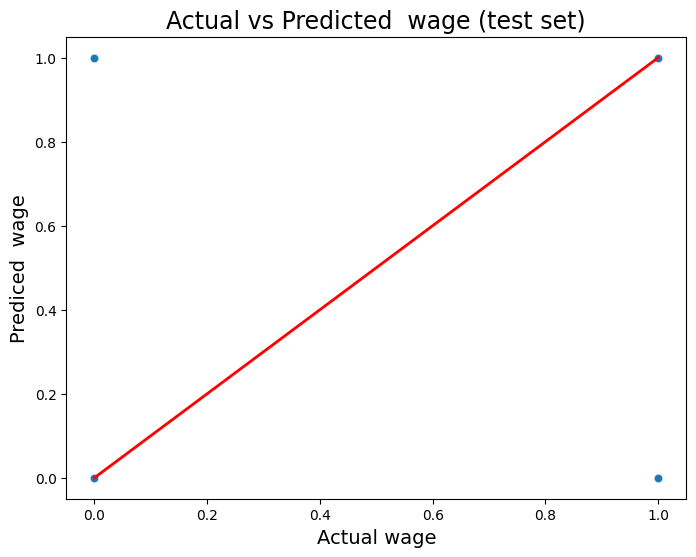

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color='red', linewidth=2)
plt.xlabel('Actual wage', fontsize=14)
plt.ylabel('Prediced  wage', fontsize=14)
plt.title('Actual vs Predicted  wage (test set)', fontsize=17)
plt.show()

In [49]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.35

In [50]:
dtree= DecisionTreeRegressor(max_depth=1)
dtree.fit(X_train[['eCO2[ppm]']], y_train)
wage_hat = dtree.predict(X_test[['eCO2[ppm]']])

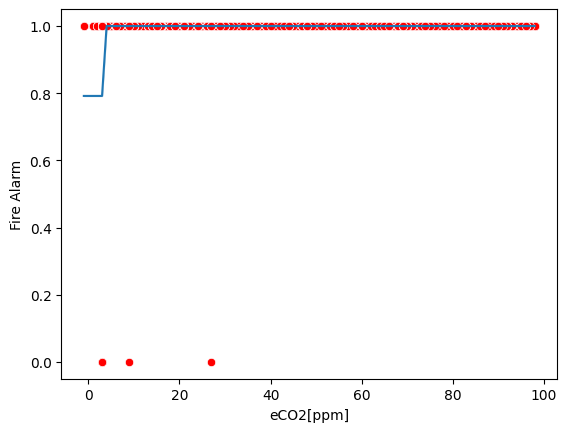

In [51]:
sns.scatterplot(x=X_test['eCO2[ppm]'], y=y_test, color='red')
sns.lineplot(x=X_test['eCO2[ppm]'], y=wage_hat)
plt.show()

In [52]:
dtree.score(np.array(X_test['eCO2[ppm]']).reshape(-1,1),y_test)

0.0811153922087231

In [121]:
!pip install --pre pycaret

In [53]:
from pycaret.utils import version
from pycaret.regression import *
from pycaret.classification import *
version()

'3.2.0'

In [54]:
df_py = data.copy()

In [55]:
df_py2 = data.copy()

In [56]:
setup(data=df_py,  target='Fire Alarm', session_id=555, train_size=0.7, preprocess=True)

,Description,Value
0,Session id,555
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(35112, 15)"
4,Transformed data shape,"(35112, 15)"
5,Transformed train set shape,"(24578, 15)"
6,Transformed test set shape,"(10534, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [57]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [58]:
dt_reg = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9992,0.9995,0.9991,1.0000,0.9995,0.9966,0.9966
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [59]:
tuned_dt_reg = tune_model(dt_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9992,0.9995,0.9991,1.0000,0.9995,0.9966,0.9966
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [60]:
setup(data=df_py2,  target='Fire Alarm', session_id=555, train_size=0.7, preprocess=True, categorical_features= ['eCO2[ppm]'])

,Description,Value
0,Session id,555
1,Target,Fire Alarm
2,Target type,Binary
3,Original data shape,"(35112, 15)"
4,Transformed data shape,"(35112, 15)"
5,Transformed train set shape,"(24578, 15)"
6,Transformed test set shape,"(10534, 15)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [61]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [62]:
dt2 = create_model(estimator='dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9992,0.9995,0.9991,1.0000,0.9995,0.9966,0.9966
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [63]:
tuned_dt = tune_model(dt2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9992,0.9995,0.9991,1.0000,0.9995,0.9966,0.9966
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [64]:
##Boosting

In [68]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [66]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 217.9 kB/s eta 0:07:38
   ---------------------------------------- 0.0/99.8 MB 81.9 kB/s eta 0:20:18
   ---------------------------------------- 0.0/99.8 MB 81.9 kB/s eta 0:20:18
   ---------------------------------------- 0.1/99.8 MB 113.0 kB/s eta 0:14:43
   -------

In [72]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
GBM_classifier = GradientBoostingClassifier(random_state=1000, learning_rate=0.1, max_depth=6)
GBM_classifier.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1000, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
GBM_Regressor = GradientBoostingRegressor(random_state=1000, learning_rate=0.1, max_depth=6)
GBM_Regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=6, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=1000, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
y_hat_GBC = GBM_classifier.predict(X_test)
y_hat_GBR = GBM_Regressor.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import r2_score

print('GBC Accuracy = {}'.format(accuracy_score(y_test, y_hat_GBC)))
print('GBC f1 = {}'.format(f1_score(y_test, y_hat_GBC)))

print('GBR MSE = {}'.format(mean_squared_error(y_test, y_hat_GBR)))
print('GBR R^2 = {}'.format(r2_score(y_test, y_hat_GBR)))

GBC Accuracy = 0.9041166824889962
GBC f1 = 0.9422046506788743
GBR MSE = 0.0665095610496216
GBR R^2 = 0.42160356586743974


In [81]:
print(classification_report(y_test,y_hat_GBC))

              precision    recall  f1-score   support

           0       0.59      0.92      0.72      1536
           1       0.99      0.90      0.94     10051

    accuracy                           0.90     11587
   macro avg       0.79      0.91      0.83     11587
weighted avg       0.93      0.90      0.91     11587



In [ ]:
###Stacking

In [88]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimators = [
     ('clf_en', clf_en),
     ('clf_gini', clf_gini)
]

In [89]:
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [93]:
y_sclf = sclf.fit(X_train, y_train)
y_sclf 

StackingClassifier(cv=None,
                   estimators=[('clf_en',
                                DecisionTreeClassifier(ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       random_state=0,
                                                       splitter='best')),
                               ('clf_gini',
                                DecisionTreeClassifier(ccp_alpha=0.0,...
                                                       min_weight_fraction_leaf=0.0,
                                                       random_state=0,
                                                       splitter='best'))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=100,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=None,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=None, passthrough=False, stack_method='auto',
                   verbose=0)

In [97]:
y_sclf.score(X_test, y_test)

0.874946060239924

In [126]:
y_pred_c = y_sclf.predict(X_test)
y_pred_c

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [136]:
print('StC Accuracy = {}'.format(accuracy_score(y_test, y_pred_c)))
print('StC f1 = {}'.format(f1_score(y_test, y_pred_c)))

StC Accuracy = 0.874946060239924
StC f1 = 0.9310820451843044


In [120]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

estimators = [
     ('lr', RidgeCV()),
     ('svr', LinearSVR( random_state=42))
 ]

In [121]:
sclf_r = StackingRegressor(estimators=estimators,final_estimator=DecisionTreeRegressor())

In [122]:
y_sclf_r = sclf_r.fit(X_train, y_train)
y_sclf_r 

StackingRegressor(cv=None,
                  estimators=[('lr',
                               RidgeCV(alpha_per_target=False,
                                       alphas=(0.1, 1.0, 10.0), cv=None,
                                       fit_intercept=True, gcv_mode=None,
                                       scoring=None, store_cv_values=False)),
                              ('svr',
                               LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                         fit_intercept=True,
                                         intercept_scaling=1.0,
                                         loss='epsilon_insensitive',
                                         max_iter=1000, random_state=42,
                                         tol=0.0001, verbose=0))],
                  final_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                        criterion='squared_error',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        random_state=None,
                                                        splitter='best'),
                  n_jobs=None, passthrough=False, verbose=0)

In [123]:
y_sclf_r.score(X_test, y_test)

-0.6369152089966172

In [124]:
y_pred_r = y_sclf_r.predict(X_test)
y_pred_r

array([1., 1., 1., ..., 1., 1., 1.])

In [125]:
print('StR MSE = {}'.format(mean_squared_error(y_test, y_pred_r)))
print('StR R^2 = {}'.format(r2_score(y_test, y_pred_r)))

StR MSE = 0.1882281867610253
StR R^2 = -0.6369152089966172


In [ ]:
###Bagging

In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

In [131]:
bagg_c = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bagg_c.fit(X_train, y_train)
bagg_c.score(X_test, y_test)

0.8874600845775438

In [140]:
print('Bagg_c Accuracy = {}'.format(accuracy_score(y_test, bagg_c.predict(X_test))))
print('Bagg_c f1 = {}'.format(f1_score(y_test, bagg_c.predict(X_test))))

Bagg_c Accuracy = 0.8874600845775438
Bagg_c f1 = 0.9325051759834369


In [141]:
bagg_r = BaggingRegressor(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bagg_r.fit(X_train, y_train)
bagg_r.score(X_test, y_test)

0.3044724010411485

In [142]:
print('Bagg_r MSE = {}'.format(mean_squared_error(y_test, bagg_r.predict(X_test))))
print('Bagg_r R^2 = {}'.format(r2_score(y_test, bagg_r.predict(X_test))))

Bagg_r MSE = 0.07997842409596963
Bagg_r R^2 = 0.3044724010411485


In [ ]:
###catBoost